# Assignment - PCA & Clustering (KMeans & Hierarchical Clustering)

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree 

### Step 01: Data Reading and Data Preparation

In [3]:
#  read the data
NGO = pd.read_csv('Country-data.csv')

In [4]:
# check the data vidually
NGO.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# checking the number of rows and datatype
NGO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
# checking statistics
NGO.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# number of columns and rows in the dataset
NGO.shape

(167, 10)

In [8]:
# Checking the sum of null values in the dataset
NGO.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
NGO.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


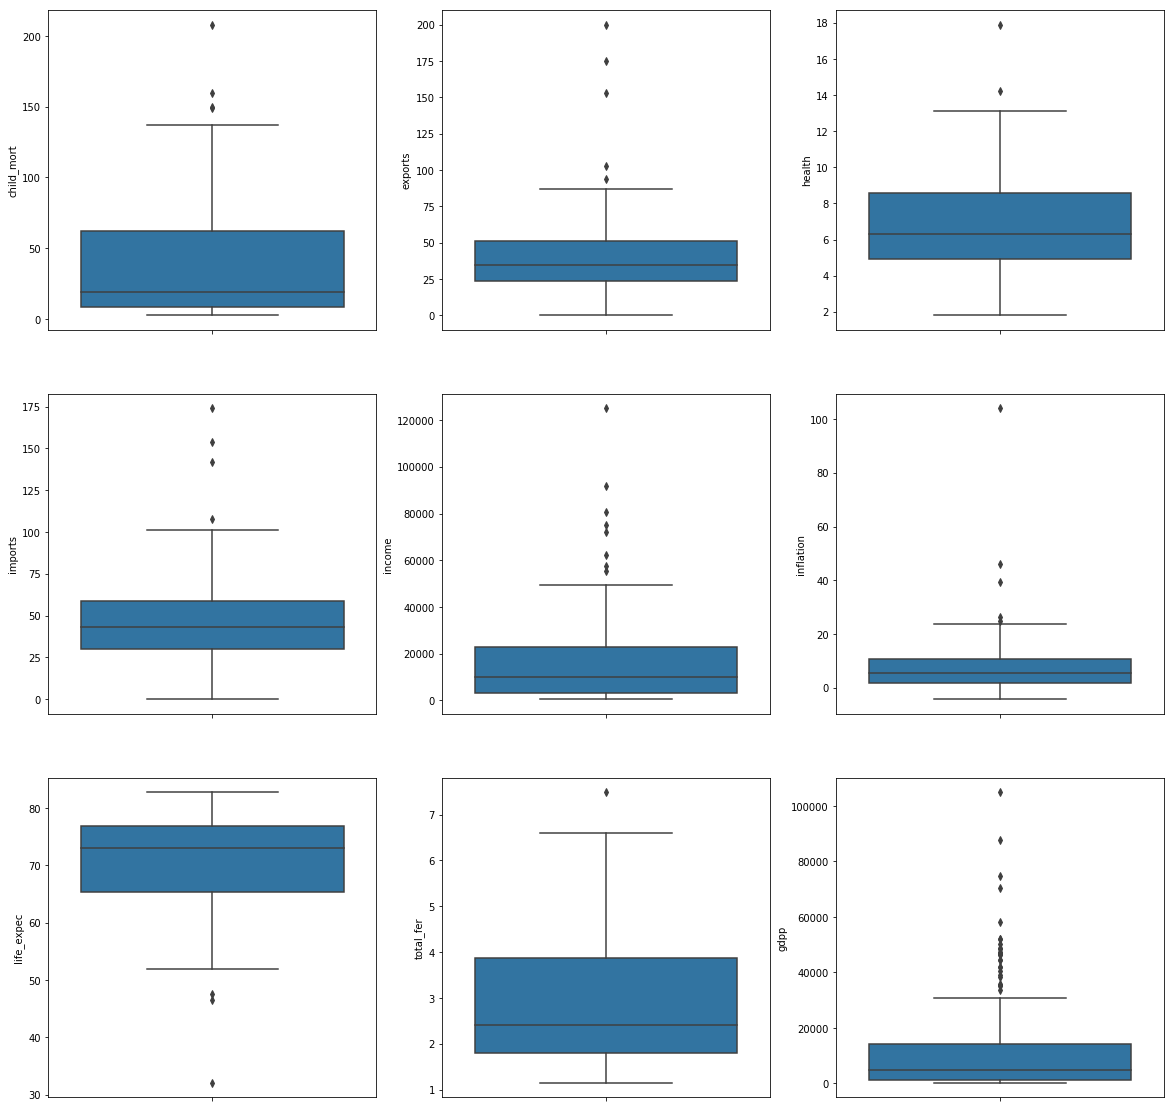

In [10]:
# visualising the outliers

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = 'child_mort', data = NGO)
plt.subplot(3,3,2)
sns.boxplot(y = 'exports', data = NGO)
plt.subplot(3,3,3)
sns.boxplot(y = 'health', data = NGO)
plt.subplot(3,3,4)
sns.boxplot(y = 'imports', data = NGO)
plt.subplot(3,3,5)
sns.boxplot(y = 'income', data = NGO)
plt.subplot(3,3,6)
sns.boxplot(y = 'inflation', data = NGO)
plt.subplot(3,3,7)
sns.boxplot(y = 'life_expec', data = NGO)
plt.subplot(3,3,8)
sns.boxplot(y = 'total_fer', data = NGO)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp', data = NGO)
plt.show()

#### Though we could treat the outliers right away, based on the guidance from the TA's; it will be done after PCA!

## Step 02: Scaling the data

In [11]:
# standardise all parameters
NGO_norm1 = NGO.drop("country", axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
NGO_norm1 = standard_scaler.fit_transform(NGO_norm1)

In [12]:
NGO_norm1 = pd.DataFrame(NGO_norm1)
NGO_norm1.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
NGO_norm1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


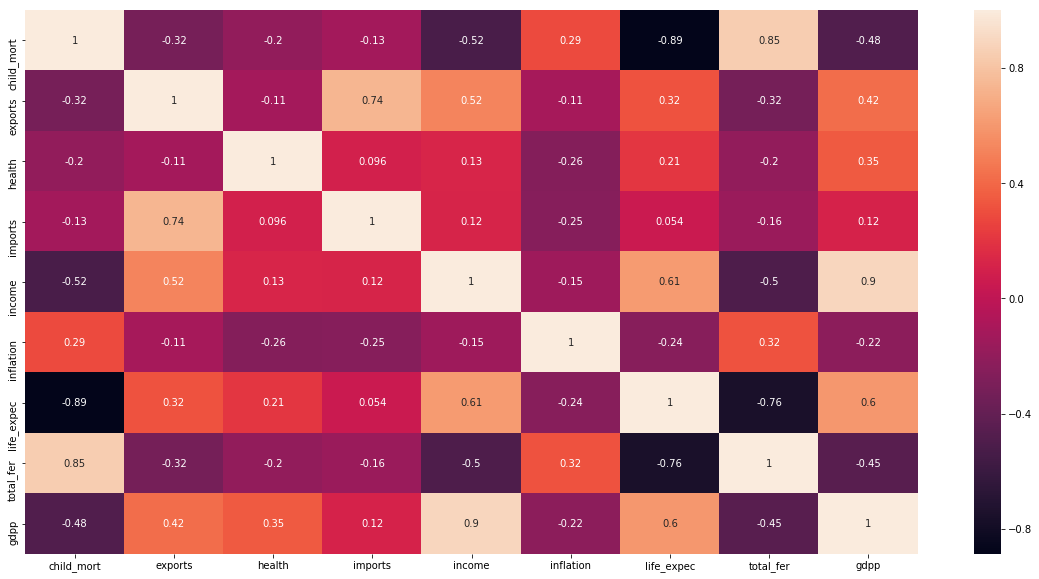

In [13]:
# created heat map to visualize the correlations between the parameters
plt.figure(figsize = (20,10))
sns.heatmap(NGO_norm1.corr(),annot = True)

## As there are many variables which are highly correlated, we decide to go with PCA which helps in dealing with the Multicollinearity issue and also for dimension reduction

### Step 03: PCA for dealing with Multicollinearity and Dimension reduction

# PCA

In [14]:
# Cheking the shape of our normalized data
NGO_norm1.shape

(167, 9)

In [15]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
#Doing the PCA on the data
pca.fit(NGO_norm1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
# looking at the PCA components created
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8
0,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
1,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022
2,-0.029544,0.144761,-0.596632,-0.299927,0.301548,0.642520,0.113919,0.019549,0.122977
3,0.370653,0.003091,0.461897,-0.071907,0.392159,0.150442,-0.203797,0.378304,0.531995
4,-0.168970,0.057616,0.518000,0.255376,-0.247150,0.714869,0.108220,-0.135262,-0.180167
5,0.200628,-0.059333,0.007276,-0.030032,0.160347,0.066285,-0.601127,-0.750689,0.016779
6,-0.079489,-0.707303,-0.249831,0.592190,0.095562,0.104633,0.018486,0.028826,0.242998
7,-0.682743,-0.014197,0.072497,-0.028946,0.352624,-0.011538,-0.504664,0.293353,-0.249696
8,0.327542,-0.123082,0.113088,0.099037,0.612982,-0.025236,0.294040,-0.026336,-0.625646


In [18]:
# creating a dataframe which includes first two PC 
colnames = list(NGO_norm1.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'Feature':colnames})
pcs_df

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income
5,-0.193173,-0.008404,0.642520,0.150442,inflation
6,0.425839,-0.222707,0.113919,-0.203797,life_expec
7,-0.403729,0.155233,0.019549,0.378304,total_fer
8,0.392645,-0.046022,0.122977,0.531995,gdpp


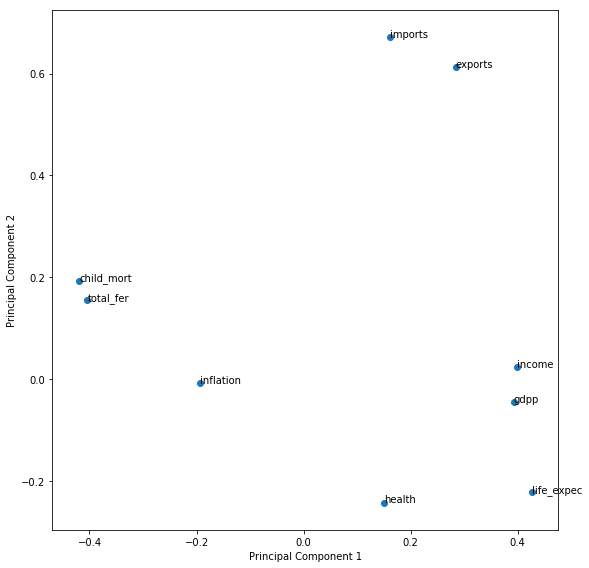

In [19]:
# Visualizing the PC's through scatter plot
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### we see that the Principal Component 1 has heavy loading on income, gdpp, life_expec and Principal Component 2 has heavy loadings on imports and exports and most of the parameters are around 0 to 0.2
    So, we can consider that PC1 is representing gdpp, income -- socio-economic parameters
    And PC2 is representing import, export, total fertility, child mortality etc

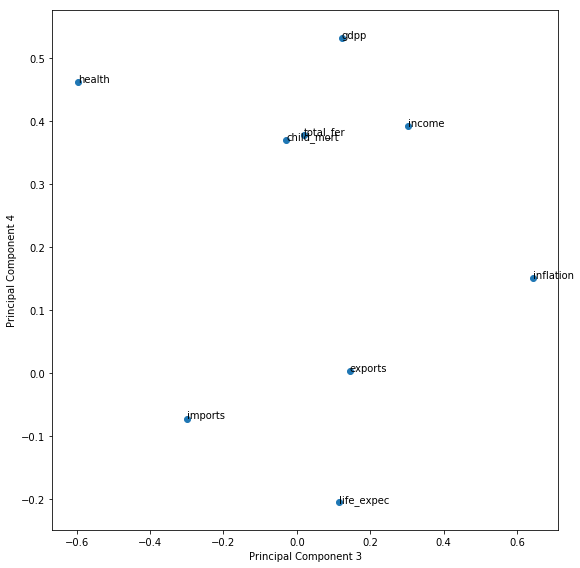

In [20]:
# Visualizing the PC's through scatter plot
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC3, pcs_df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC3[i],pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

In [21]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

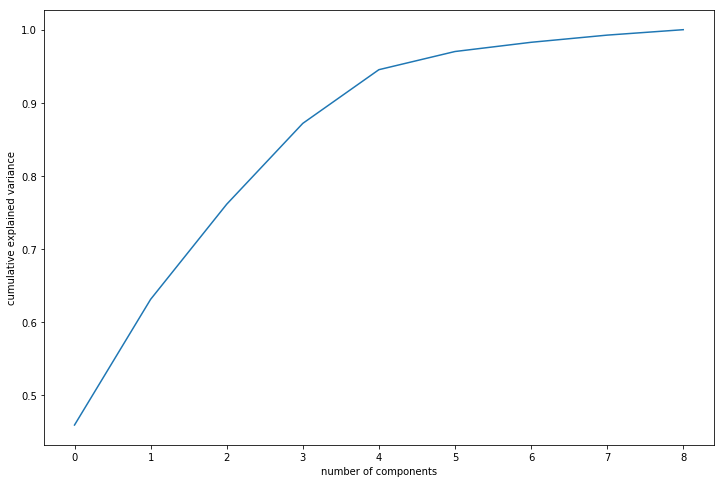

In [22]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looking at the screeplot, decided to go with four Principal Components

In [23]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [24]:
# transformed/projected the data on principal components 
df_pca = pca_final.fit_transform(NGO_norm1)
df_pca.shape

(167, 4)

In [25]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

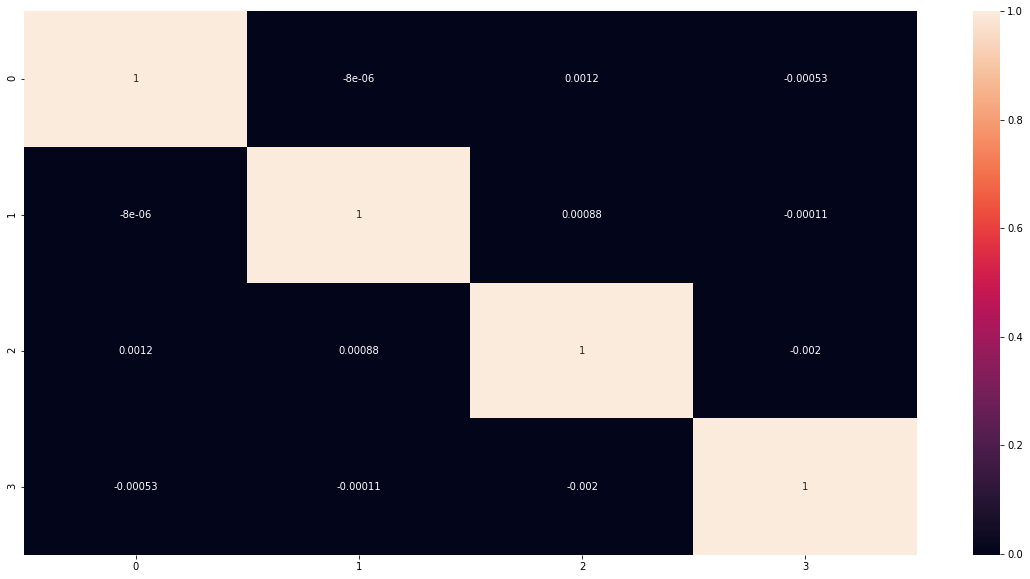

In [26]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

#### here, we see almost 0 or less correlation between the parameters suggesting no multicollinearity now

In [27]:
# joining the PC dataframe with the original dataframe
pca_1 = pd.concat([pd.DataFrame(df_pca),NGO['country']],axis=1)
pca_1 = pca_1.rename(columns={0:'PC01',1:'PC02',2:'PC03',3:'PC04','country':'country'})
pca_1

,PC01,PC02,PC03,PC04,country
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan
1,0.429358,-0.587859,0.321052,-1.171193,Albania
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria
3,-2.930969,1.699437,-1.521734,0.875966,Angola
4,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda
5,0.028470,-1.756721,-0.793520,-0.052486,Argentina
6,-0.102849,-0.567476,-0.277669,-1.458321,Armenia
7,2.339456,-1.998120,-0.237052,1.132490,Australia
8,2.973859,-0.734849,0.548421,1.192561,Austria
9,-0.180006,-0.393752,-0.864255,-0.426657,Azerbaijan


In [28]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
pca_1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC01,PC02,PC03,PC04
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.659217e-17,1.429329e-17,-2.476396e-17,1.662011e-17
std,2.039726e+00,1.247144e+00,1.083371e+00,1.000238e+00
min,-4.878925e+00,-2.991196e+00,-5.590269e+00,-1.582161e+00
25%,-1.383574e+00,-7.481349e-01,-4.154744e-01,-7.901529e-01
50%,2.418370e-02,-9.344038e-02,1.937511e-01,-2.939462e-01
75%,1.224232e+00,5.568934e-01,5.140716e-01,7.090722e-01
90%,2.461331e+00,1.276336e+00,1.067970e+00,1.226926e+00
95%,3.105192e+00,1.716160e+00,1.465341e+00,1.775725e+00
99%,4.761754e+00,4.808004e+00,2.531317e+00,2.780284e+00


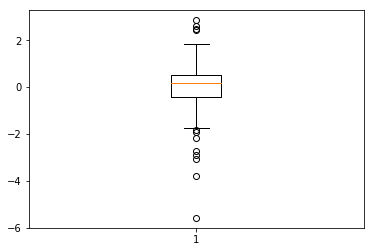

In [29]:
# outlier treatment for PC03
plt.boxplot(pca_1.PC03)
Q1 = pca_1.PC03.quantile(0.25)
Q3 = pca_1.PC03.quantile(0.75)
IQR = Q3 - Q1
pca_2 = pca_1[(pca_1.PC03 >= Q1 - 1.5*IQR) & (pca_1.PC03 <= Q3 + 1.5*IQR)]

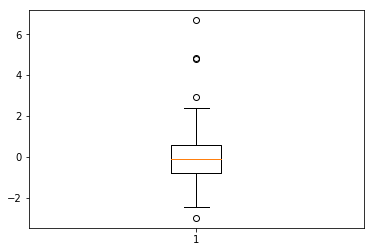

In [30]:
# outlier treatment for PC02
plt.boxplot(pca_2.PC02)
Q1 = pca_2.PC02.quantile(0.25)
Q3 = pca_2.PC02.quantile(0.75)
IQR = Q3 - Q1
pca_2 = pca_2[(pca_2.PC02 >= Q1 - 1.5*IQR) & (pca_2.PC02 <= Q3 + 1.5*IQR)]

In [31]:
# taking out the outlier data into a separate dataframe
pca_2_outlier = pca_1[~pca_1.country.isin(pca_2.country)]

In [32]:
# checking the outlier dataframe
pca_2_outlier

,PC01,PC02,PC03,PC04,country
23,2.459953,0.021044,-3.074741,0.860320,Brunei
81,-1.239107,0.367490,2.435513,0.525576,Kiribati
82,2.463398,0.082795,-2.741979,0.798283,Kuwait
87,-1.803591,2.042345,2.594980,0.998154,Lesotho
88,-1.771653,1.056052,2.498521,1.101975,Liberia
91,6.918224,4.854921,-0.926665,3.150200,Luxembourg
98,3.684916,4.783835,1.170379,-0.574644,Malta
101,-0.376569,0.111981,2.857371,0.669839,"Micronesia, Fed. Sts."
113,-4.878925,0.040809,-5.590269,2.350105,Nigeria
115,1.128562,0.495996,-2.166082,-0.124911,Oman


##### outliers are very less and hence doesn't seem to be needed assigining back to clusters

In [33]:
# making a separate dataframe to bring the original feature with the cleaned dataframe
pca_3 = pca_2.merge(NGO, how='inner', on='country')

In [34]:
# checking the newly created dataframe
pca_3

,PC01,PC02,PC03,PC04,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,0.429358,-0.587859,0.321052,-1.171193,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,-2.930969,1.699437,-1.521734,0.875966,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,0.028470,-1.756721,-0.793520,-0.052486,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,-0.102849,-0.567476,-0.277669,-1.458321,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,2.339456,-1.998120,-0.237052,1.132490,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,2.973859,-0.734849,0.548421,1.192561,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,-0.180006,-0.393752,-0.864255,-0.426657,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [35]:
# dropping the 'Country' column from the pca_1 dataframe since we need to do KMeans on this
pca_2 = pca_2.drop(['country'],axis=1)

### Step 04: Hopkins Coefficient (for clustering tendency) & Silhouette coefficient (to decide number of clusters)

In [36]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
hopkins(pca_2)

0.7174739038253471

#### 0.74 indicates a good score to proceed with clustering

In [38]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_2)
    sse_.append([k, silhouette_score(pca_2, kmeans.labels_)])

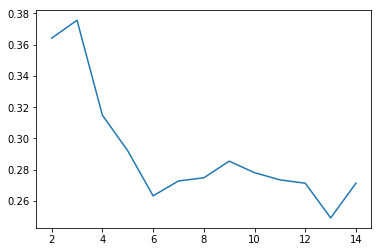

In [39]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

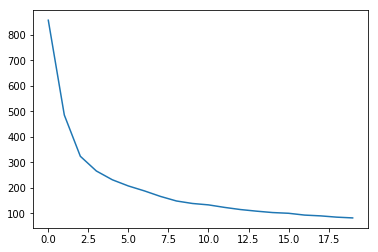

In [40]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### based on the above Sum of square and Silhouette plot, selected 4 clusters

# KMeans Clustering

### Step 05 : Model Building (KMeans with '3' clusters)

In [41]:
# Kmeans with K=3
model_clus5 = KMeans(n_clusters = 3, max_iter=50)
model_clus5.fit(pca_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
# changing the index
pca_2.index = pd.RangeIndex(len(pca_2.index))
pca_3.index = pd.RangeIndex(len(pca_3.index))

In [43]:
# analysis of clusters formed
NGO_km = pd.concat([pca_3, pd.Series(model_clus5.labels_)], axis=1)
NGO_km.columns = ['PC01','PC02','PC03','PC04','country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [44]:
# checking number of items for each cluster
NGO_km.ClusterID.value_counts()

1    79
2    43
0    28
Name: ClusterID, dtype: int64

In [45]:
# calculated mean 
km_clusters_child_mort = pd.DataFrame(NGO_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(NGO_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(NGO_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(NGO_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(NGO_km.groupby(["ClusterID"]).income.mean())
km_clusters_life_expec = pd.DataFrame(NGO_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(NGO_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(NGO_km.groupby(["ClusterID"]).gdpp.mean())

In [46]:
# created a dataframe with mean of each parameter
df = pd.concat([pd.Series([0,1,2]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.521429,45.200000,9.670714,43.389286,37360.714286,80.289286,1.740714,40603.571429
1,1,21.997468,39.922646,6.182152,47.014758,11657.341772,72.825316,2.280633,5972.177215
2,2,92.732558,29.604884,6.069535,39.495349,4077.511628,59.379070,5.055349,1977.558140


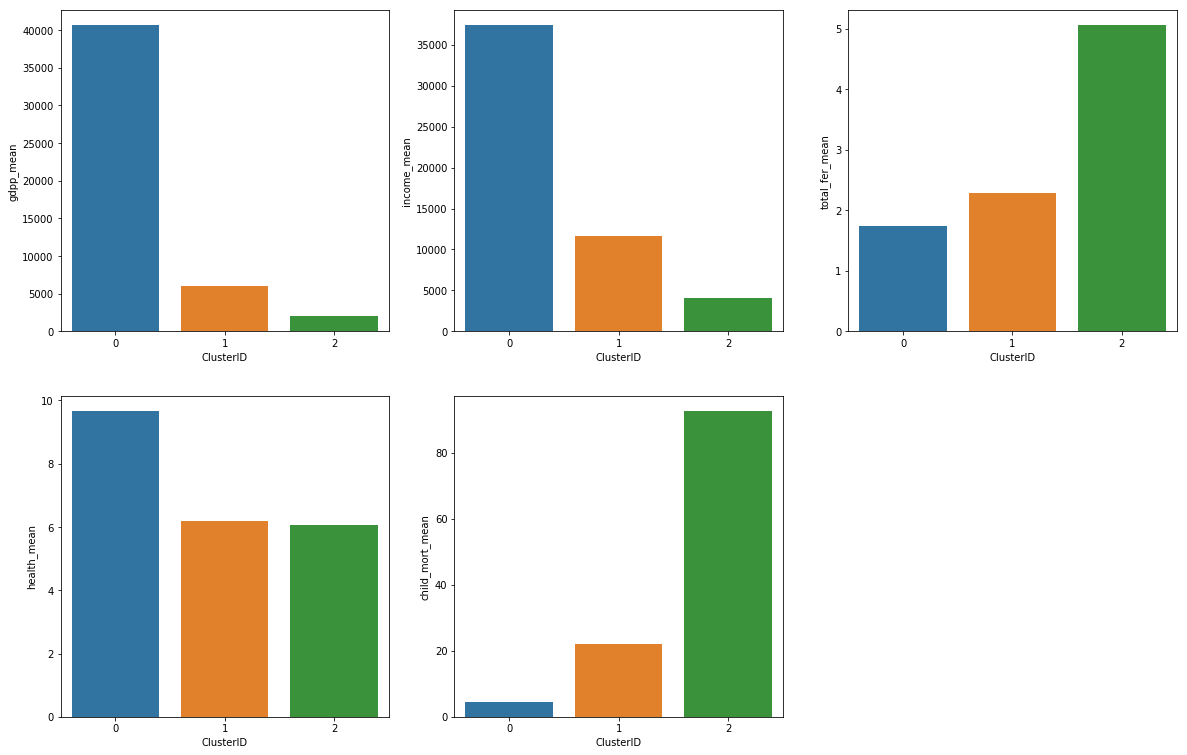

In [47]:
# visualising few of the parameters on clusters formed

plt.figure(figsize=(20, 13))
plt.subplot(2,3,1)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.subplot(2,3,2)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(2,3,3)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(2,3,4)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(2,3,5)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.show()

### so, it appears that the ClusterID- 2 is having lowest gdpp, income and high fertilty and child mortality 

### Step 06 : Model Building (KMeans with '4' clusters)

In [48]:
# Kmeans with K=4
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(pca_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
# changing the index
pca_2.index = pd.RangeIndex(len(pca_2.index))
pca_3.index = pd.RangeIndex(len(pca_3.index))

In [50]:
# analysis of clusters formed
NGO_km = pd.concat([pca_3, pd.Series(model_clus5.labels_)], axis=1)
NGO_km.columns = ['PC01','PC02','PC03','PC04','country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [51]:
# checking number of items for each cluster
NGO_km.ClusterID.value_counts()

2    53
1    41
0    33
3    23
Name: ClusterID, dtype: int64

In [52]:
# calculated mean 
km_clusters_child_mort = pd.DataFrame(NGO_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(NGO_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(NGO_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(NGO_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(NGO_km.groupby(["ClusterID"]).income.mean())
km_clusters_life_expec = pd.DataFrame(NGO_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(NGO_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(NGO_km.groupby(["ClusterID"]).gdpp.mean())

In [53]:
# created a dataframe with mean of each parameter
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,30.454545,26.963303,5.398788,30.135330,10122.727273,71.727273,2.593333,4790.484848
1,1,94.802439,28.680732,6.075122,40.129268,3591.048780,59.102439,5.091220,1750.853659
2,2,16.326415,49.775472,6.784906,57.750943,14258.113208,73.643396,2.088302,8382.377358
3,3,4.117391,42.986957,10.144348,40.295652,39365.217391,80.926087,1.795217,44330.434783


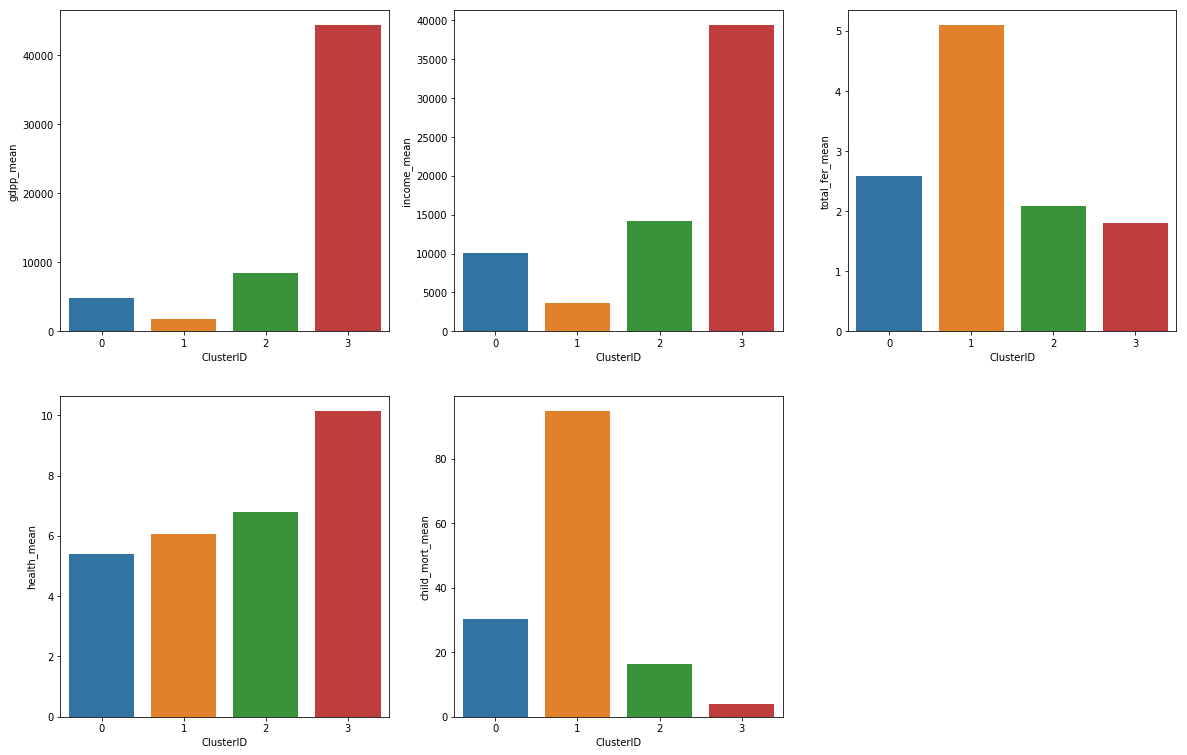

In [54]:
# visualising few of the parameters on clusters formed

plt.figure(figsize=(20, 13))
plt.subplot(2,3,1)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.subplot(2,3,2)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(2,3,3)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(2,3,4)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(2,3,5)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.show()

### so, it appears that the ClusterID- 1 is having lowest gdpp, income and high fertilty and child mortality 

# Hierarchical Clustering

### Step 07: Model Building (Hierarchical)

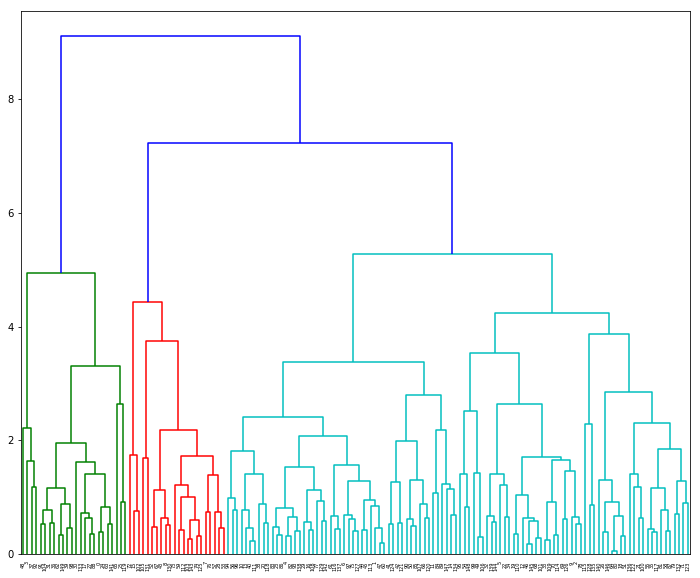

In [55]:
# heirarchical clustering
plt.figure(figsize=(12, 10))
mergings = linkage(pca_2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [56]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
NGO_hc = pd.concat([pca_3, clusterCut], axis=1)
NGO_hc.columns = ['PC01','PC02','PC03','PC04','country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [57]:
# checking number of items for each cluster
NGO_hc.ClusterID.value_counts()

2    52
1    52
0    24
3    22
Name: ClusterID, dtype: int64

In [58]:
# calculated mean 
km_clusters_child_mort = pd.DataFrame(NGO_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(NGO_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(NGO_hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(NGO_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(NGO_hc.groupby(["ClusterID"]).income.mean())
km_clusters_life_expec = pd.DataFrame(NGO_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(NGO_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(NGO_hc.groupby(["ClusterID"]).gdpp.mean())

In [59]:
# created a dataframe with mean of each parameter
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,113.108333,31.571667,6.140000,41.250000,3306.375000,56.375000,5.589167,1576.708333
1,1,14.309615,46.311538,6.885769,54.986538,14974.423077,74.757692,2.021346,8899.038462
2,2,44.263462,30.811135,5.592885,36.810883,7839.230769,67.930769,3.217692,3787.423077
3,3,4.159091,42.018182,10.177727,39.268182,39850.000000,80.990909,1.805455,45281.818182


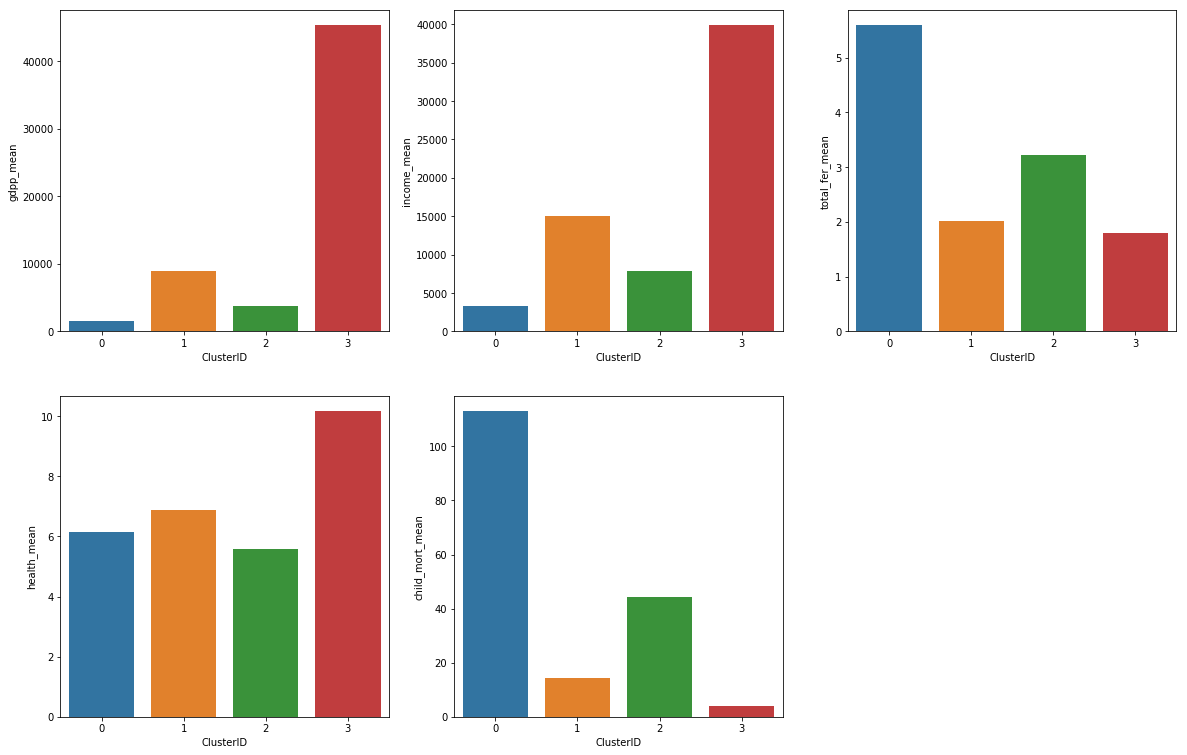

In [60]:
# visualising few of the parameters on clusters formed

plt.figure(figsize=(20, 13))
plt.subplot(2,3,1)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.subplot(2,3,2)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(2,3,3)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(2,3,4)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(2,3,5)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.show()

### so, it appears that the ClusterID- 0 is having lowest gdpp, income and high fertilty and child mortality 